In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime

In [3]:
df = pd.read_csv('C:/Users/RomaneGauriau/Documents/PERSO/diabete/data_2020-05-11.csv', dtype={'Horodatage de l\'appareil':str})
df = df.rename(columns={'Horodatage de l\'appareil': 'DateTime', 'Historique de la glycemie mg/dL':'glycemie_mgdL',
                       'Insuline a action rapide (unites)':'insuline_rapide', 'Insuline a action longue (unites)':'insuline_longue',
                       'Glucides (grammes)':'glucides_g'})

In [4]:
def format_date(x):
    if '-' in x:
        return x.replace('-', '/')
    elif '/' in x:
        return x

df['DateTimeNorm'] = df['DateTime'].apply(lambda x: format_date(x))
df['DateTimeNorm'] = pd.to_datetime(df['DateTimeNorm'], format="%d/%m/%Y %H:%M", infer_datetime_format=False)
df['Date'] = df['DateTimeNorm'].dt.date
df['Time'] = df['DateTimeNorm'].dt.time
df['DateTime_Diff'] = (pd.to_datetime(df['DateTimeNorm']) - pd.to_datetime('01/01/2020 00:00'))
df['DateTime_Diff_s'] = df['DateTime_Diff'].dt.total_seconds()

In [4]:
df.sample(5)

,Appareil,Numero de serie,DateTime,Date,Time,Type d'enregistrement,glycemie_mgdL,Numerisation de la glycemie mg/dL,Insuline a action rapide sans valeur numerique,insuline_rapide,...,insuline_longue,Remarques,Glycemie par bandelette mg/dL,Cetone mmol/L,Insuline repas (unites),Correction insuline (unites),Insuline modifiee par l'utilisateur (unites),DateTimeNorm,DateTime_Diff,DateTime_Diff_s
12506,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,30-01-2020 22:51,2020-01-30,22:51:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30 22:51:00,29 days 22:51:00,2587860.0
5524,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,28-03-2020 22:40,2020-03-28,22:40:00,0.0,157.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-28 22:40:00,87 days 22:40:00,7598400.0
2837,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,29-02-2020 14:48,2020-02-29,14:48:00,0.0,172.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29 14:48:00,59 days 14:48:00,5150880.0
7690,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,20-04-2020 16:39,2020-04-20,16:39:00,0.0,136.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-20 16:39:00,110 days 16:39:00,9563940.0
11183,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,21-04-2020 09:59,2020-04-21,09:59:00,1.0,NaN,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-21 09:59:00,111 days 09:59:00,9626340.0


## Annotate fasting

In [73]:
df[df['Remarques'].fillna('').str.lower().str.contains('jeune')]

,Appareil,Numero de serie,DateTime,Date,Time,Type d'enregistrement,glycemie_mgdL,Numerisation de la glycemie mg/dL,Insuline a action rapide sans valeur numerique,insuline_rapide,...,Glycemie par bandelette mg/dL,Cetone mmol/L,Insuline repas (unites),Correction insuline (unites),Insuline modifiee par l'utilisateur (unites),DateTimeNorm,DateTime_Diff,DateTime_Diff_s,fasting,phys_activity
13299,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,16-03-2020 10:45,2020-03-16,10:45:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-03-16 10:45:00,75 days 10:45:00,6518700.0,True,False
13322,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,18-03-2020 12:58,2020-03-18,12:58:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-03-18 12:58:00,77 days 12:58:00,6699480.0,True,False
13333,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,19-03-2020 00:25,2020-03-19,00:25:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-03-19 00:25:00,78 days 00:25:00,6740700.0,True,False
13351,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,19-03-2020 23:56,2020-03-19,23:56:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-03-19 23:56:00,78 days 23:56:00,6825360.0,True,False
13366,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,21-03-2020 04:34,2020-03-21,04:34:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-03-21 04:34:00,80 days 04:34:00,6928440.0,True,False
13391,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,22-03-2020 13:22,2020-03-22,13:22:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-03-22 13:22:00,81 days 13:22:00,7046520.0,True,False
13402,FreeStyle LibreLink,50ed8f14-0e26-4367-8f84-787647b0990b,22-03-2020 20:09,2020-03-22,20:09:00,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-03-22 20:09:00,81 days 20:09:00,7070940.0,True,False


In [5]:
df['fasting'] = (df['Date']<=datetime.date(2020,3,22)) & (df['Date']>=datetime.date(2020,3,16))

## Annotate exercice

In [6]:
df_phys_dates = df[df['Remarques'].fillna('').str.lower().str.contains('|'.join(['exercice' , 'gym']))]['Date']
df['phys_activity'] = df['Date'].isin(df_phys_dates)
df['phys_activity'] = df['phys_activity'].astype('int')

df['phys_activity'].value_counts()

0    7796
1    6184
Name: phys_activity, dtype: int64

In [7]:
df_glycemie = df[~df['glycemie_mgdL'].isnull()].loc[:, ['Date', 'DateTime', 'glycemie_mgdL', 'DateTime_Diff_s', 'DateTimeNorm', 'fasting', 'phys_activity']]
df_glycemie = df_glycemie.sort_values('DateTime_Diff_s')
print(len(df_glycemie))

df_insuline_rapid = df[~df['insuline_rapide'].isnull() & 
                      (df['DateTime_Diff_s']>3600*24*30)].loc[:, ['Date', 'DateTime_Diff_s', 'DateTimeNorm', 'insuline_longue', 'insuline_rapide', 'fasting', 'phys_activity']]
df_insuline_rapid['insuline_rapide'] = df_insuline_rapid['insuline_rapide'].str.replace(',','.').astype('float')
df_insuline_rapid = df_insuline_rapid.sort_values('DateTime_Diff_s')
print(len(df_insuline_rapid))
df_insuline_long = df[~df['insuline_longue'].isnull() & 
                      (df['DateTime_Diff_s']>3600*24*30)].loc[:, ['Date', 'DateTime_Diff_s', 'DateTimeNorm', 'insuline_longue', 'insuline_rapide', 'fasting', 'phys_activity']]
df_insuline_long['insuline_longue'] = df_insuline_long['insuline_longue'].str.replace(',','.').astype('float')
df_insuline_long = df_insuline_long.sort_values('DateTime_Diff_s')

df_glucides = df[~df['glucides_g'].isnull() & 
                      (df['DateTime_Diff_s']>3600*24*30)].loc[:, ['Date', 'DateTime_Diff_s', 'DateTimeNorm', 'glucides_g', 'fasting', 'phys_activity']]
df_glucides = df_glucides.sort_values('DateTime_Diff_s')

9674
509


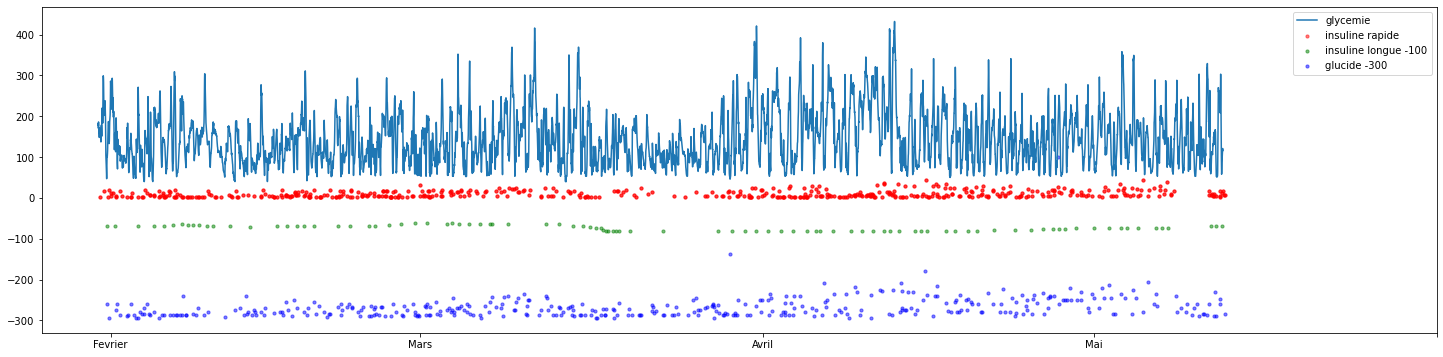

In [19]:
plt.figure(figsize=(25,6))
plt.plot(df_glycemie['DateTime_Diff_s'], df_glycemie['glycemie_mgdL'], label='glycemie')
plt.scatter(df_insuline_rapid['DateTime_Diff_s'], df_insuline_rapid['insuline_rapide'], s=10, color='red', alpha=0.5, label='insuline rapide')
plt.scatter(df_insuline_rapid['DateTime_Diff_s'], df_insuline_rapid['insuline_rapide'], s=10, color='red', alpha=0.5)
plt.scatter(df_insuline_long['DateTime_Diff_s'], df_insuline_long['insuline_longue']-100, s=10, color='green', alpha=0.5, label='insuline longue -100')
#plt.plot(df_insuline_long['DateTime_Diff_s']/(24*3600*30), df_insuline_long['insuline_longue']-100, color='green', alpha=0.5)
plt.scatter(df_glucides['DateTime_Diff_s'], df_glucides['glucides_g']-300, s=10, color='blue', alpha=0.5, label='glucide -300')
#plt.plot(df_glucides['DateTime_Diff_s']/(24*3600*30), df_glucides['glucides_g']-300, color='blue', alpha=0.5)
x = np.cumsum(np.asarray([31,28,31,30,31]))*24*3600
xlabel = ['Fevrier', 'Mars', 'Avril', 'Mai']
plt.xticks(x, xlabel)
plt.legend()
plt.show()

In [116]:
df_glycemie_day

,glycemie_mgdL,DateTime_Diff_s,fasting,phys_activity
Date,,,,
2020-01-30,169.357143,2.585430e+06,False,False
2020-01-31,175.416667,2.634928e+06,False,False
2020-02-01,159.864583,2.721318e+06,False,False
2020-02-02,108.322917,2.807672e+06,False,False
2020-02-03,103.802083,2.894031e+06,False,False
...,...,...,...,...
2020-05-07,149.987342,1.101117e+07,False,False
2020-05-08,133.062500,1.110234e+07,False,False
2020-05-09,118.978947,1.118887e+07,False,False


In [20]:
df_glycemie.groupby('Date').agg(['mean', 'min', 'max'])

glycemie_mgdL               DateTime_Diff_s              \
                    mean    min    max            mean         min   
Date                                                                 
2020-01-30    169.357143  148.0  186.0    2.585430e+06   2579580.0   
2020-01-31    175.416667   47.0  299.0    2.634928e+06   2592180.0   
2020-02-01    159.864583   71.0  293.0    2.721318e+06   2678580.0   
2020-02-02    108.322917   62.0  183.0    2.807672e+06   2764920.0   
2020-02-03    103.802083   44.0  271.0    2.894031e+06   2851320.0   
...                  ...    ...    ...             ...         ...   
2020-05-07    149.987342   58.0  288.0    1.101117e+07  10972980.0   
2020-05-08    133.062500   61.0  247.0    1.110234e+07  11059320.0   
2020-05-09    118.978947   53.0  303.0    1.118887e+07  11146380.0   
2020-05-10    160.821053   59.0  329.0    1.127491e+07  11232420.0   
2020-05-11    154.238095   51.0  303.0    1.134647e+07  11318400.0   

                       fasting               phys_activity          
                   max    mean    min    max          mean min max  
Date                                                                
2020-01-30   2591280.0   False  False  False             0   0   0  
2020-01-31   2677680.0   False  False  False             0   0   0  
2020-02-01   2764020.0   False  False  False             0   0   0  
2020-02-02   2850420.0   False  False  False             0   0   0  
2020-02-03   2936700.0   False  False  False             0   0   0  
...                ...     ...    ...    ...           ...  ..  ..  
2020-05-07  11058420.0   False  False  False             0   0   0  
2020-05-08  11145480.0   False  False  False             0   0   0  
2020-05-09  11231520.0   False  False  False             0   0   0  
2020-05-10  11317500.0   False  False  False             0   0   0  
2020-05-11  11374500.0   False  False  False             0   0   0  

[103 rows x 12 columns]

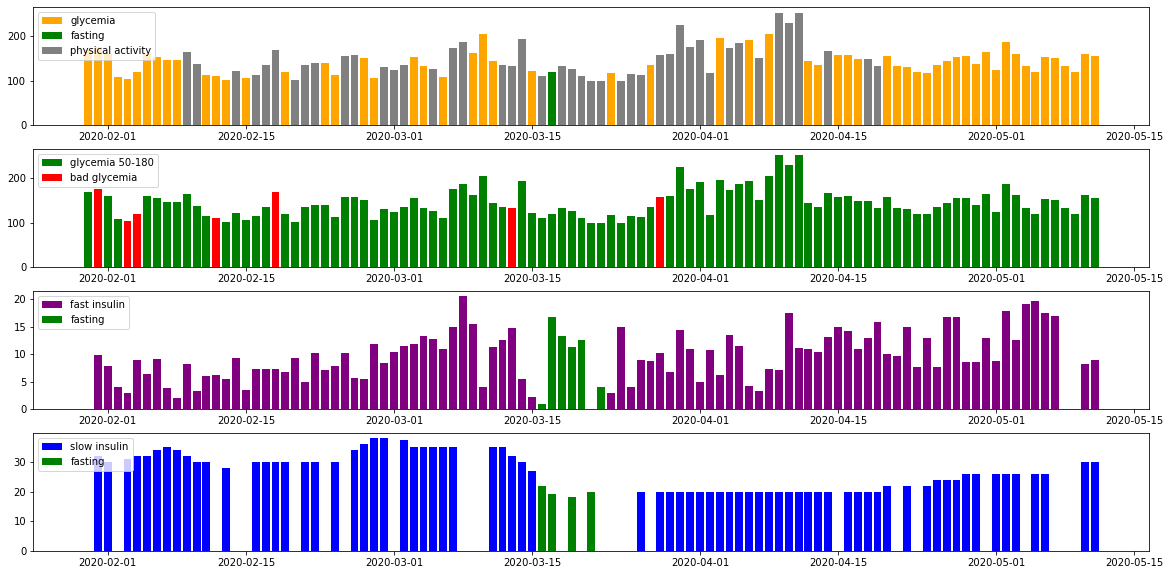

In [46]:
df_glycemie_day = df_glycemie.groupby('Date').agg(['mean', 'min', 'max'])

df_insuline_long_day = df_insuline_long.groupby('Date').mean()
df_insuline_rapid_day = df_insuline_rapid.groupby('Date').mean()

plt.figure(figsize=(20,10))

ax1 = plt.subplot(4,1,1)
plt.bar(df_glycemie_day.index, df_glycemie_day['glycemie_mgdL']['mean'], label='glycemia', color='orange')
plt.bar(df_glycemie_day[df_glycemie_day['fasting']['mean']]['glycemie_mgdL']['mean'].index, 
        df_glycemie_day[df_glycemie_day['fasting']['mean']]['glycemie_mgdL']['mean'], label='fasting', color='green')
plt.bar(df_glycemie_day[df_glycemie_day['phys_activity']['mean']>0]['glycemie_mgdL']['mean'].index, 
        df_glycemie_day[df_glycemie_day['phys_activity']['mean']>0]['glycemie_mgdL']['mean'], label='physical activity', color='grey')
plt.legend(loc='upper left')
plt.subplot(412, sharex=ax1)
plt.bar(df_glycemie_day.index, df_glycemie_day['glycemie_mgdL']['mean'], label='glycemia 50-180', color='green')
df_ = ((df_glycemie_day['glycemie_mgdL']['min']<50) & (df_glycemie_day['glycemie_mgdL']['max']>180))
plt.bar(df_glycemie_day[df_].index, df_glycemie_day[df_]['glycemie_mgdL']['mean'], label='bad glycemia', color='red')
plt.legend(loc='upper left')
plt.subplot(413, sharex=ax1)
plt.bar(df_insuline_rapid_day.index, df_insuline_rapid_day['insuline_rapide'], label='fast insulin', color='purple')
plt.bar(df_insuline_rapid_day[df_insuline_rapid_day['fasting']].index, df_insuline_rapid_day[df_insuline_rapid_day['fasting']]['insuline_rapide'], label='fasting', color='green')
plt.legend(loc='upper left')
plt.subplot(414, sharex=ax1)
plt.bar(df_insuline_long_day.index, df_insuline_long_day['insuline_longue'],label='slow insulin', color='blue')
plt.bar(df_insuline_long_day[df_insuline_long_day['fasting']].index, df_insuline_long_day[df_insuline_long_day['fasting']]['insuline_longue'], label='fasting', color='green')
plt.legend(loc='upper left')
plt.show()

In [175]:
df_glycemie_day

,glycemie_mgdL,DateTime_Diff_s
Date,,
2020-01-30,169.357143,2.585430e+06
2020-01-31,175.416667,2.634928e+06
2020-02-01,159.864583,2.721318e+06
2020-02-02,108.322917,2.807672e+06
2020-02-03,103.802083,2.894031e+06
...,...,...
2020-05-07,149.987342,1.101117e+07
2020-05-08,133.062500,1.110234e+07
2020-05-09,118.978947,1.118887e+07


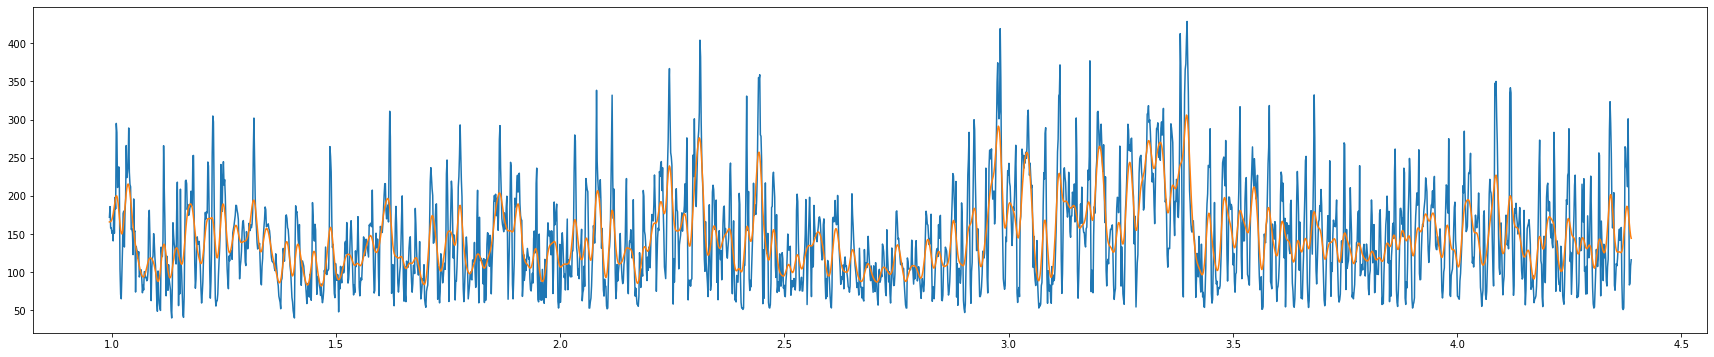

In [92]:
from scipy import interpolate
from scipy.ndimage import gaussian_filter

glyc_interp = interpolate.interp1d(np.asarray(df_glycemie['DateTime_Diff_s']), np.asarray(df_glycemie['glycemie_mgdL']))

x = np.arange(df_glycemie['DateTime_Diff_s'].min(), df_glycemie['DateTime_Diff_s'].max(), 3600)
glyc_interp_values = glyc_interp(x)
glyc_interp_values_filt = gaussian_filter(glyc_interp_values, sigma=4)

plt.figure(figsize=(30,6))
plt.plot(x/(24*3600*30), glyc_interp_values)
plt.plot(x/(24*3600*30), glyc_interp_values_filt)
plt.show()

In [84]:
len(x)

366455

In [75]:
df_glycemie['DateTime_Diff_s'].min()/3600

716.55

In [82]:
glyc_interp()